In [1]:
import matplotlib.pyplot as plt
import numpy as np

Mola nova

In [2]:
RPM_Motora1 = [1420,
               1580,
               1521,
               2580,
               2542,
               2580,
               3677,
               3720,
               3723]

RPM_Movida1 = [298,
               329,
               326,
               3228,
               3050,
               3081,
               4549,
               4576,
               4592]

print('Caso 1 - Mola nova sem carga')
relacao1 = [RPM_Motora1[i]/RPM_Movida1[i] for i in range(len(RPM_Motora1))]
Rmax1 = (relacao1[0] + relacao1[1] + relacao1[2])/3
RPM_Rmax1 = (RPM_Motora1[0] + RPM_Motora1[1] + RPM_Motora1[2])/3
print(f'Redução máxima: {Rmax1:.2f} a {RPM_Rmax1:.0f} RPM')

Rmin1 = (relacao1[3] + relacao1[4] + relacao1[5])/3
RPM_Rmin1 = (RPM_Motora1[3] + RPM_Motora1[4] + RPM_Motora1[5])/3
print(f'Redução mínima: {Rmin1:.2f} a {RPM_Rmin1:.0f} RPM')

print(f'Faixa de trabalho CVT: {RPM_Rmax1:.0f} a {RPM_Rmin1:.0f} RPM ({RPM_Rmin1 - RPM_Rmax1:.0f})')

RPM_F1 = (RPM_Motora1[-1]+RPM_Motora1[-2]+RPM_Motora1[-3])/3
print(f'RPM final: {RPM_F1:.0f}')

R_F1 = (relacao1[-1] + relacao1[-2] + relacao1[-3])/3
print(f'Relação à {RPM_F1:.0f} RPM: {R_F1:.2f}')

velocidade1 = [((0.377*0.2667*RPM_Motora1[i])/(7.2*relacao1[i]))
               for i in range(len(RPM_Motora1))]
Vmax1 = (velocidade1[-1]+velocidade1[-2]+velocidade1[-3])/3

print(f'Velocidade máxima: {Vmax1:.2f} Km/h')

torque_Motor = [
    24.9,  # 2k
    26.5,  # 2,5k
    26,  # 3k
    22.5  # 3,6
]

f2k1 = ((2.9 * 7.2)*torque_Motor[0])/0.2667
f25k1 = ((Rmin1 * 7.2)*torque_Motor[1])/0.2667
f3k1 = ((Rmin1 * 7.2)*torque_Motor[2])/0.2667
f36k1 = ((Rmin1 * 7.2)*torque_Motor[3])/0.2667

print(f'Força na roda em 2000 RPM: {f2k1:.0f} N')
print(f'Força na roda em 2500 RPM: {f25k1:.0f} N')
print(f'Força na roda em 3000 RPM: {f3k1:.0f} N')
print(f'Força na roda em 3600 RPM: {f36k1:.0f} N')

print('Temperatura da correia no fim do teste: 54 ºC')

Caso 1 - Mola nova sem carga
Redução máxima: 4.74 a 1507 RPM
Redução mínima: 0.82 a 2567 RPM
Faixa de trabalho CVT: 1507 a 2567 RPM (1060)
RPM final: 3707
Relação à 3707 RPM: 0.81
Velocidade máxima: 63.85 Km/h
Força na roda em 2000 RPM: 1949 N
Força na roda em 2500 RPM: 589 N
Força na roda em 3000 RPM: 578 N
Força na roda em 3600 RPM: 500 N
Temperatura da correia no fim do teste: 54 ºC


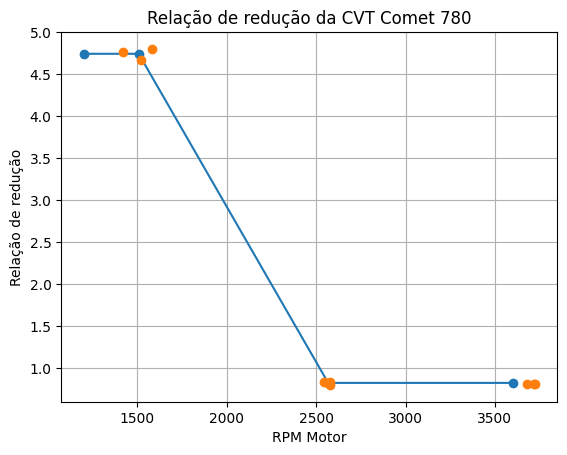

In [7]:
RPM_Motora_F1 = [1200, RPM_Rmax1, RPM_Rmin1, 3600]
Relacao_F1 = [Rmax1, Rmax1, Rmin1, Rmin1]

plt.plot(RPM_Motora_F1, Relacao_F1, 'o-', label='Caso 1')
plt.plot(RPM_Motora1, relacao1, 'o', label='Pontos experimentais')
plt.grid()
plt.xlabel('RPM Motor')
plt.ylabel('Relação de redução')
plt.title('Relação de redução da CVT Comet 780')
plt.show()

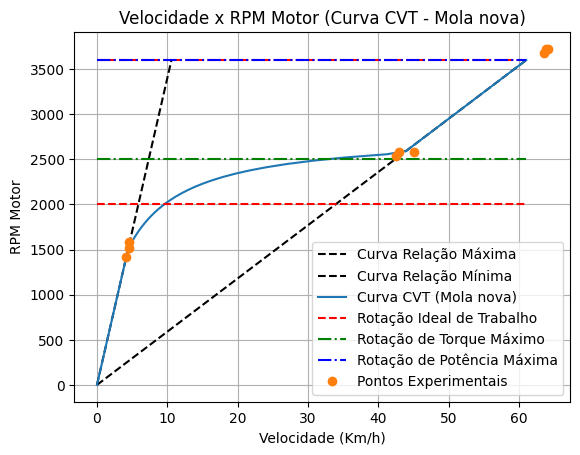

In [4]:
RPM = np.linspace(0, 3600, 101)


def rela(RPM):
    if RPM <= RPM_Rmax1:
        return Rmax1
    else:
        if RPM <= RPM_Rmin1:
            a = (Rmax1-Rmin1)/(RPM_Rmax1-RPM_Rmin1)
            b = Rmax1-(RPM_Rmax1*a)
            return (a*RPM)+b
        else:
            return Rmin1


V_F1 = [((0.377*0.2667*RPM_Motora_F1[i])/(7.2*Relacao_F1[i]))
        for i in range(len(RPM_Motora_F1))]

V1 = [((0.377*0.2667*RPM[i])/(7.2*rela(RPM[i])))
      for i in range(len(RPM))]

V_Rel_Max1 = [((0.377*0.2667*RPM[i])/(7.2*Rmax1))
              for i in range(len(RPM))]

V_Rel_Min1 = [((0.377*0.2667*RPM[i])/(7.2*Rmin1))
              for i in range(len(RPM))]

RPM_MIN = [2000 for i in range(len(V1))]
RPM_MAX = [3600 for i in range(len(V1))]
RPM_TMAX = [2500 for i in range(len(V1))]
RPM_PMAX = [3600 for i in range(len(V1))]
# plt.figure(figsize=(8,10))
plt.plot(V_Rel_Max1, RPM, 'k--', label='Curva Relação Máxima')
plt.plot(V_Rel_Min1, RPM, 'k--', label='Curva Relação Mínima')
plt.plot(V1, RPM, '-', label='Curva CVT (Mola nova)')
plt.plot(V1, RPM_MIN, 'r--', label='Rotação Ideal de Trabalho')
plt.plot(V1, RPM_MAX, 'r--')
plt.plot(V1, RPM_TMAX, 'g-.', label='Rotação de Torque Máximo')
plt.plot(V1, RPM_PMAX, 'b-.', label='Rotação de Potência Máxima')
plt.plot(velocidade1, RPM_Motora1, 'o', label='Pontos Experimentais')
plt.legend()
plt.grid()
plt.xlabel('Velocidade (Km/h)')
plt.ylabel('RPM Motor')
plt.title('Velocidade x RPM Motor (Curva CVT - Mola nova)')
plt.show()